<center> 

## Proyecto Final Sprint 8

</center>

Hay varios pasos que se realizaron para obtener información antes de poder probar la hipótesis. Como el código que se utilizó fue Python y también SQL el cual no se puede simular aquí, voy a dejar el código de SQL en celdas markdown.

Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
#Importación de datos desde la web
url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(url)
sopita = BeautifulSoup(req.text, 'lxml')
tabla = sopita.find('table',attrs={"id": "weather_records"})

#Conversión de la tabla a DataFrame
titulos_tabla = []
for row in tabla.find_all('th'):
    titulos_tabla.append(row.text)

contenido = []
for row in tabla.find_all('tr'):
    if not row.find_all('th'):
        contenido.append([element.text for element in row.find_all('td')])

weather_records = pd.DataFrame(contenido,columns=titulos_tabla)

Ahora empezaremos a usar SQL para obtener más información para la prueba de hipótesis, aquí dejo un diagrama E-R para tener un mejor panorama de la base de datos que tenemos.

![alt text](<Diagrama E-R.png>)

##### Paso 1.
Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

In [4]:
#SELECT 
#    cabs.company_name AS company_name,
#    SUM(subconsulta.trips_amount) AS trips_amount
#FROM
#    cabs
#    INNER JOIN
#    (SELECT
#        cab_id,
#        COUNT(trips.trip_id) AS trips_amount
#    FROM 
#        trips
#    WHERE 
#        CAST(start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
#    GROUP BY 
#        cab_id) AS subconsulta ON subconsulta.cab_id = cabs.cab_id
#GROUP BY 
#    company_name
#ORDER BY 
#    trips_amount DESC;

##### Paso 2.
Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

In [3]:
#SELECT 
#    subconsulta.company_name,
#    COUNT(trips.cab_id) as trips_amount
#FROM
#    trips
#    INNER JOIN
#    (SELECT 
#        cab_id,
#        company_name
#    FROM 
#        cabs
#    WHERE 
#        company_name LIKE '%Yellow%' OR company_name LIKE '%Blue%') AS subconsulta ON subconsulta.cab_id = trips.cab_id
#WHERE 
#    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
#GROUP BY 
#    company_name

##### Paso 3.
Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

In [ ]:
#SELECT 
#    CASE WHEN subconsulta.company_name = 'Flash Cab' THEN 'Flash Cab'
#    WHEN subconsulta.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
#    ELSE 'Other' 
#    END AS company_name,
#    COUNT(trips.trip_id) AS trips_amount
#FROM 
#    trips
#    INNER JOIN 
#    (SELECT
#        cabs.cab_id,
#        cabs.company_name AS company_name
#    FROM 
#        cabs) AS subconsulta ON subconsulta.cab_id = trips.cab_id
#WHERE 
#    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
#GROUP BY 
#    CASE WHEN subconsulta.company_name = 'Flash Cab' THEN 'Flash Cab'
#    WHEN subconsulta.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
#    ELSE 'Other' 
#    END
#ORDER BY 
#    trips_amount DESC;

##### Paso 4.
Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

In [6]:
#SELECT 
#    neighborhood_id,
#    name
#FROM 
#    neighborhoods    
#WHERE 
#    name LIKE '%O''Hare%' OR name LIKE 'Loop'

##### Paso 5.
Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

In [7]:
#SELECT 
#    ts,
#    CASE WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
#    ELSE 'Good' END AS weather_conditions
#FROM 
#    weather_records 

##### Paso 6.
Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Las columnas de la tabla deben estar en el siguiente orden:
- start_ts
- weather_conditions
- duration_seconds
- Ordena por trip_id.

In [8]:
#SELECT 
#    trips.start_ts AS start_ts,
#    subconsulta.weather_conditions AS weather_conditions,
#    trips.duration_seconds AS duration_seconds
#FROM 
#    trips
#    INNER JOIN
#    (SELECT 
#        ts,
#        CASE WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
#        ELSE 'Good' END AS weather_conditions
#    FROM 
#        weather_records) AS subconsulta ON subconsulta.ts = trips.start_ts
#WHERE 
#    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT(DOW FROM trips.start_ts) = 6
#ORDER BY 
#    trip_id

## Introducción

Para este proyecto se trabajo anteriormente con una base de datos de SQL, de ésta misma se obtuvieron distintas tablas para un analasis posterior en Python. 

Como compañía nueva en el mercado de taxis, estamos evaluando quienes son nuestros principales competencias, así como saber cuales son los vecinadrios con mayor movimiento para poco a poco poder entrar en el mercado e irnos dando a conocer. 

También una parte importante de éste estudio es el de analizar si los recorridos los días sábados, desde el vecindario de Loop hasta el Aeropuerto Internacional de Chicago (O'Hare) se ven afectados por el clima, lo cual puede repercutir en una baja de viajes em comparacion a los días con un buen clima.

### Importar los archivos

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import levene
from scipy import stats as st

In [2]:
company_and_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
dropoff_and_avg = pd.read_csv("/datasets/project_sql_result_04.csv")
loop_to_airport = pd.read_csv("/datasets/project_sql_result_07.csv")

### Asegurarte de que los tipos de datos sean correctos

Analisis del primer DataFrame (company_and_trips)

In [3]:
print('Primeras 5 líneas del DataFrame')
display(company_and_trips.head())
print('Información general del DataFrame')
company_and_trips.info()
print('Media, Desviación estándar, mínimo, máximo y cuartiles del DataFrame')
company_and_trips.describe()

Primeras 5 líneas del DataFrame


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
Media, Desviación estándar, mínimo, máximo y cuartiles del DataFrame


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Con el método info() podemos observar que no hay valores nulos en este DF, también podemos observar que la diferencia entre el número de viajes de las diferentes compañías es muy variable desde 2 hasta 19,558. Lo cual explica el valor tan alto de la desviación estándar.

In [4]:
print('Primeras 5 líneas del DataFrame')
display(dropoff_and_avg.head())
print('Información general del DataFrame')
dropoff_and_avg.info()
print('Media, Desviación estándar, mínimo, máximo y cuartiles del DataFrame')
dropoff_and_avg.describe()

Primeras 5 líneas del DataFrame


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
Media, Desviación estándar, mínimo, máximo y cuartiles del DataFrame


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Podemos observar cuales son los 5 destinos más populares en los servicios de taxis, así como también podemos notar que los lugares más populares como destino son menos del 25% de la lista (menos de 23 destinos).

### Asegurarte de que los tipos de datos sean correctos
Los tipos de datos son correctos. Aunque algunos nombres de compañías se ven raros por tener unos números en sus nombres. Voy a analizar si hay valores duplicados, ya que con los métodos info nos dimos cuenta de que no hay valores nulos y el tipo de datos está en el formato correcto.

In [5]:
print(f'Hay {company_and_trips.duplicated().sum()} valores duplicados en el DataFrame company_and_trips')
print(f'Hay {dropoff_and_avg.duplicated().sum()} valores duplicados en el DataFrame dropoff_and_avg')
print(f'Hay {loop_to_airport.duplicated().sum()} valores duplicados en el DataFrame loop_to_airport')

Hay 0 valores duplicados en el DataFrame company_and_trips
Hay 0 valores duplicados en el DataFrame dropoff_and_avg
Hay 197 valores duplicados en el DataFrame loop_to_airport


Existen 197 datos duplicados en el DataFrame, en teoría no debería de haber datos duplicados ya que se agruparon por hora. Por tal motivo y al ser datos que ya se tienen para evitar estos duplicados los voy a eliminar del DF.

In [6]:
loop_to_airport = loop_to_airport.drop_duplicates()

### Identificar los 10 principales barrios en términos de finalización del recorrido

In [7]:
display(dropoff_and_avg.head(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Hacer gráficos: empresas de taxis y número de viajes

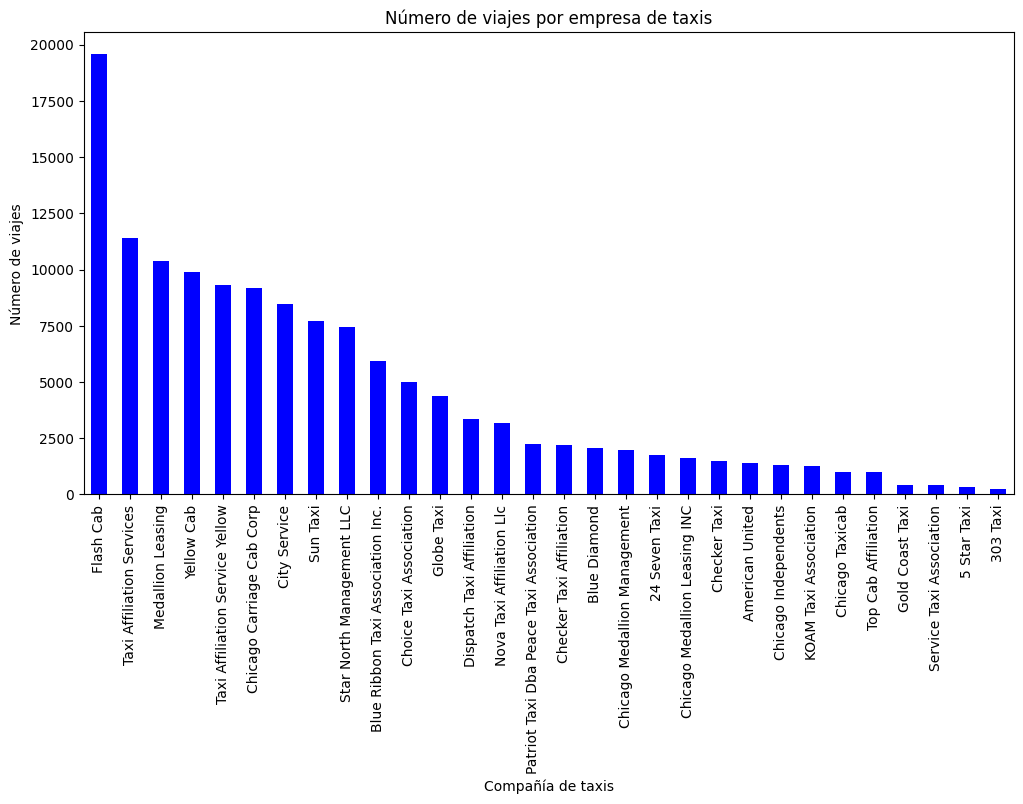

In [8]:
company_and_trips.head(30).plot(kind="bar", 
                                x="company_name", 
                                y="trips_amount", 
                                xlabel="Compañía de taxis", 
                                ylabel="Número de viajes",
                                title="Número de viajes por empresa de taxis", 
                                color="blue", 
                                figsize=(12, 6), 
                                legend=False)
plt.show()

Mostré en la gráfica solo las 30 compañias de taxis más populares ya que mostrar todas ensuciaba mucho el gráfico y apartir de la compañia 30 hasta la última los valores ya no varían mucho y no tiene caso mostrarlos.

Podemos notar que las compañías más populares por los usuarios son Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, entre otras. 

### Los 10 barrios principales por número de finalizaciones

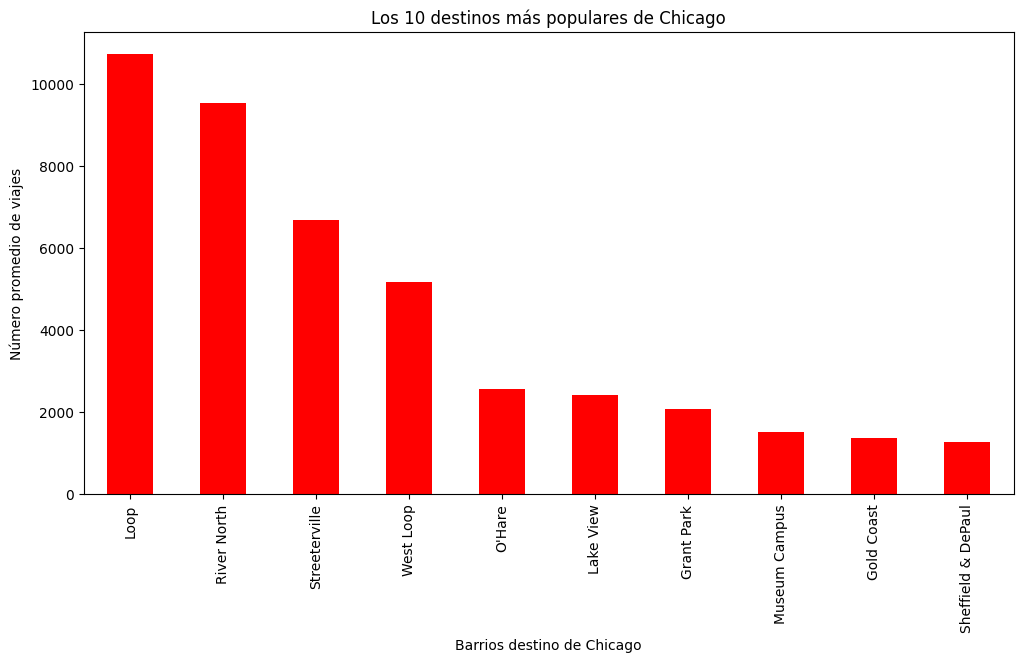

In [9]:
dropoff_and_avg.head(10).plot(kind="bar", 
                              x="dropoff_location_name", 
                              y="average_trips", 
                              xlabel="Barrios destino de Chicago", 
                              ylabel="Número promedio de viajes", 
                              title="Los 10 destinos más populares de Chicago", 
                              color="red", 
                              figsize=(12, 6), 
                              legend=False)
plt.show()

Con la gráfica anterior podemos notar que los destinos más populares en Chicago son Loop, River North, Streeterville, entre otros.

### Prueba la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Para ésta prueba de hipótesis vamos a definir nuestra hipótesis nula y alternativa.

- H0: la duración promedio de los viajes es igual en climas buenos como en climas malos.
- H1: la duración promedio de los viajes var´´ia dependiendo del clima.

In [10]:
print('Primeras 5 líneas del DataFrame')
display(loop_to_airport.head())
print('Información general del DataFrame')
loop_to_airport.info()
print('Media, Desviación estándar, mínimo, máximo y cuartiles del DataFrame')
loop_to_airport.describe()

Primeras 5 líneas del DataFrame


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB
Media, Desviación estándar, mínimo, máximo y cuartiles del DataFrame


,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


Este DataFrame será el que usaremos más adelante para nuestra poner a prueba nuestra hipótesis y llegar a las conclusiones correspondientes. Podemos observar que hay una gran variación entre los tiempos del recorrido ya que van desde 24 minutos hasta más de 2 horas. 

In [11]:
# Primera voy a separar los datos por la descripción de los días entre buenos y malos

good_days = loop_to_airport[loop_to_airport["weather_conditions"]
                            == "Good"]["duration_seconds"]
bad_days = loop_to_airport[loop_to_airport["weather_conditions"]
                           == "Bad"]["duration_seconds"]

# Ahora voy a utilizar el método levene para determinar si equal_var es True o False.

beta = 0.05
w_stats, p_value = levene(good_days, bad_days)
if p_value < beta:
    variable = False
else:
    variable = True

# Ahora voy a utilizar el método ttest_ind para determinar si la duración promedio de los viajes desde el 
# Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

# Mi hipótesis nula es que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional 
# O'Hare es igual los sábados con buen clima y en días lluviosos.

alpha = 0.05
results = st.ttest_ind(good_days, bad_days, equal_var=variable)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No podemor rechazar la hipótesis nula")

Se rechaza la hipótesis nula


Explica:

1. ¿Cómo planteaste las hipótesis nula y alternativa?
   - Mi hipóteiss nula es que la duración de los viajes es igual tanto días buenos como malos y mi hipótesis alternativa es que si varían.
3. ¿Qué criterio usaste para probar las hipótesis y por qué?
   - Utilice el método ttest de dos colas para muestras independientes.

### Conclusiones de la hipótesis.

Al rechazarse la hipótesis nula se puede concluir que la duración de los viajes desde Loop hasta el aeropuerto de Chicago los días sábados en días lluviosos es distinta a la de los días sin lluvia. 